In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.transforms as mtransforms
import matplotlib as mpl
import numpy as np
from scipy.stats import nbinom
import scipy.stats as stats
from scipy.special import gamma
import pandas as pd
import random
from math import comb
import math
from pickle import dump
from pickle import load
from tqdm import tqdm
import itertools

In [145]:
mpl.rc('image', cmap='viridis')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 40}

mpl.rc('font', **font)

## Network generating functions

In [18]:
def generate_premises_grid(m,n):
    
    base = nx.grid_2d_graph(m,n) 
    edge_attr = {}
    i=0
    for edge in base.edges():
        edge_attr[edge] = {"weight": 1}
    nx.set_edge_attributes(base, edge_attr)
    return base

In [19]:
def generate_premises_er(n,p):
    s = random.randint(0, 1e14)
    base = nx.erdos_renyi_graph(n, p,seed = s)
    edge_attr = {}
    i=0
    for edge in base.edges():
        edge_attr[edge] = {"weight": 1}
    nx.set_edge_attributes(base, edge_attr)
    return base

In [20]:
def generate_premises_power_law(n,p):
    s = random.randint(0, 1e14)
    deg_seq = nx.utils.powerlaw_sequence(n,p,seed = s) 
    for i in range(len(deg_seq)):
        deg_seq[i] = round(deg_seq[i])
    deg_seq = sorted(deg_seq)
    if sum(deg_seq)%2 !=0:
        deg_seq[-1] +=1

    
    base = nx.configuration_model(deg_seq)
    
    
    base.remove_edges_from(nx.selfloop_edges(base))
    base = nx.Graph(base)
    edge_attr = {}
    i=0
    for edge in base.edges():
        edge_attr[edge] = {"weight": 1}
    nx.set_edge_attributes(base, edge_attr)

    
    
    return base
    

In [21]:
def generate_premises_grid_random(m,n,P,D):
    base = nx.create_empty_copy(nx.grid_2d_graph(m,n))
    
    
    edges = itertools.combinations(base.nodes, 2)

    for e in edges:
        ds = abs(e[0][0]-e[1][0])**2 + abs(e[0][1]-e[1][1])**2
        p = P*np.exp(-ds/(2*D*D))
        if random.uniform(0,1) < p:
            base.add_edge(*e)
    return base

In [22]:
def add_premise_attr(G,pop,T):
    node_attr = {}
    i=0
    for node in G.nodes():
        node_attr[node] = {"pop": pop[i],
                          "status":["S" for i in range(T+1)],
                          "zone" : False}
        i+=1
        
    for e in G.edges:
        G.get_edge_data(e[1],e[0])["weight"] = 1
    nx.set_node_attributes(G,node_attr)

In [23]:
def add_premise_pop(G,pop,T):
    node_attr = {}
    i=0
    for node in G.nodes():
        node_attr[node] = {"pop": pop[i]}
        i+=1
        
    for e in G.edges:
        G.get_edge_data(e[1],e[0])["weight"] = 1
    nx.set_node_attributes(G,node_attr)

## Generate Networks

In [25]:
n_gen_networks = 0
n = 32
power = (7*n-8)/(3*n-4)
grid_sum = 4*n*n-4*n
while n_gen_networks<10:
    deg_sum = -138947
    G = generate_premises_power_law(n*n,power)
    deg_sum = sum([G.degree(n) for n in G.nodes])
    
    if abs( (grid_sum-deg_sum)/grid_sum)<0.01:
        filename = "networks\\powerlaw" + str(n_gen_networks+1).rjust(3,"0") + ".pkl"
        with open((filename), 'wb') as f:
            dump(G,f)
            
        n_gen_networks += 1
        


In [26]:
n_gen_networks = 0
n = 32
power = 4/(n*(n-1))
grid_sum = 4*n*n-4*n
deg_sum = 0
while n_gen_networks<10:
    
    
    G = generate_premises_er(n*n,power)
    deg_sum = sum([G.degree(n) for n in G.nodes])
    
    if abs( (grid_sum-deg_sum)/grid_sum)<0.01:
        filename = "networks\\er" + str(n_gen_networks+1).rjust(3,"0") + ".pkl"
        with open((filename), 'wb') as f:
            dump(G,f)
            
        n_gen_networks += 1
        

In [183]:
n = 32
G = generate_premises_grid(100,100) 

filename = "networks\\grid.pkl"
with open((filename), 'wb') as f:
    dump(G,f)
            
        

In [40]:
Ds = 1
n_gen_networks = 0
n =32
grid_sum = 4*n*n-4*n
expected_per_node = (4*(n-2)**2 + 12*(n-2) + 8)/n**2
P = 1.25*expected_per_node/(2*np.pi*Ds*Ds)
while n_gen_networks<10:
    G = generate_premises_grid_random(n,n,P,Ds)
    deg_sum = sum([G.degree(n) for n in G.nodes])
    if abs( (grid_sum-deg_sum)/grid_sum)<0.01:
        filename = "networks\\grid_r_D=1_" + str(n_gen_networks+1).rjust(3,"0") + ".pkl"
        with open((filename), 'wb') as f:
            dump(G,f)
            
        n_gen_networks += 1



In [41]:
Ds = 1.5
n_gen_networks = 0
n =32
grid_sum = 4*n*n-4*n
expected_per_node = (4*(n-2)**2 + 12*(n-2) + 8)/n**2
P = 1.15*expected_per_node/(2*np.pi*Ds*Ds)
while n_gen_networks<10:
    G = generate_premises_grid_random(n,n,P,Ds)
    deg_sum = sum([G.degree(n) for n in G.nodes])
    if abs( (grid_sum-deg_sum)/grid_sum)<0.01:
        filename = "networks\\grid_r_D=1.5_" + str(n_gen_networks+1).rjust(3,"0") + ".pkl"
        with open((filename), 'wb') as f:
            dump(G,f)
            
        n_gen_networks += 1



In [42]:
Ds = 2
n_gen_networks = 0
n =32
grid_sum = 4*n*n-4*n
expected_per_node = (4*(n-2)**2 + 12*(n-2) + 8)/n**2
P = 1.15*expected_per_node/(2*np.pi*Ds*Ds)
while n_gen_networks<10:
    G = generate_premises_grid_random(n,n,P,Ds)
    deg_sum = sum([G.degree(n) for n in G.nodes])
    if abs( (grid_sum-deg_sum)/grid_sum)<0.01:
        filename = "networks\\grid_r_D=2_" + str(n_gen_networks+1).rjust(3,"0") + ".pkl"
        with open((filename), 'wb') as f:
            dump(G,f)
            
        n_gen_networks += 1



In [43]:
Ds = 3
n_gen_networks = 0
n =32
grid_sum = 4*n*n-4*n
expected_per_node = (4*(n-2)**2 + 12*(n-2) + 8)/n**2
P = 1.19*expected_per_node/(2*np.pi*Ds*Ds)
while n_gen_networks<10:
    G = generate_premises_grid_random(n,n,P,Ds)
    deg_sum = sum([G.degree(n) for n in G.nodes])
    if abs( (grid_sum-deg_sum)/grid_sum)<0.01:
        filename = "networks\\grid_r_D=3_" + str(n_gen_networks+1).rjust(3,"0") + ".pkl"
        with open((filename), 'wb') as f:
            dump(G,f)
            
        n_gen_networks += 1

## Degree Plots

In [46]:
degrees_power = []
degrees_er = []
with open(('networks/grid.pkl'), 'rb') as f:
        G = load(f)
degrees_grid = [G.degree(n) for n in G.nodes]

for i in range(1,11,1):
  
    filename = "networks\\powerlaw" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    degrees_power.extend([G.degree(n) for n in G.nodes])
        
    filename = "networks\\er" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)    
    degrees_er.extend([G.degree(n) for n in G.nodes])

In [58]:
bins1= np.arange(1,101,1)
bins2 = np.arange(101,max(degrees_power)+10,100 )
bins3 = np.arange(0,400,1)

In [50]:
degrees_1 = []
degrees_15 = []
degrees_2 = []
degrees_3 = []

with open(('networks/grid.pkl'), 'rb') as f:
        G = load(f)
degrees_grid = [G.degree(n) for n in G.nodes]

for i in range(1,11,1):
    filename = "networks/grid_r_D=1_" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    degrees_1.extend([G.degree(n) for n in G.nodes])
  
    filename = "networks/grid_r_D=1.5_" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    degrees_15.extend([G.degree(n) for n in G.nodes])
        
    filename = "networks/grid_r_D=2_" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    degrees_2.extend([G.degree(n) for n in G.nodes])
    
    filename = "networks/grid_r_D=3_" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    degrees_3.extend([G.degree(n) for n in G.nodes])

In [51]:
bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5]

## Connectivity Plots

In [27]:
def connectivity(G,node):
    N = len(G.nodes)
    results = [[node]]
    connected = [node]
    new_connections = [node]
    while (new_connections != []):
       
        last_connections = new_connections

        new_connections = []
        
        for node2 in last_connections:
            for node3 in G.neighbors(node2):
                if (node3 not in new_connections) and (node3 not in connected):
                    new_connections.append(node3)        
       
        connected.extend(new_connections)
        results.append(connected.copy())
     
    
    return [len(i)/N for i in results]

In [28]:
con_data_grid = []
filename = "networks/grid.pkl"
with open((filename), 'rb') as f:
    G = load(f)
    
for j in tqdm(range(100)):
    n = random.choice(list(G.nodes))
    con_data_grid.append(connectivity(G,n))
end = max([len(k) for k in con_data_grid])

for data in con_data_grid:
    while len(data)<end:
        data.append(data[-1])
    

100%|██████████| 100/100 [00:03<00:00, 33.22it/s]


In [29]:
LI_g = []
UI_g = []
med_g = []
for i in range(len(con_data_grid[0])):
    L = []
    for j in con_data_grid:
        L.append(j[i])

    LI_g.append(np.percentile(L,2.5))
    UI_g.append(np.percentile(L,97.5))
    med_g.append(np.percentile(L,50))

In [30]:
con_data_grid_r_1 = []
for i in range(1,11,1):
    filename = "networks/grid_r_D=1_" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    for j in range(10):
        n = random.choice(list(G.nodes))
        con_data_grid_r_1.append(connectivity(G,n))
end = max([len(k) for k in con_data_grid_r_1])

for data in con_data_grid_r_1:
    while len(data)<end:
        data.append(data[-1])
    

In [31]:
LI_1 = []
UI_1 = []
med_1 = []
for i in range(len(con_data_grid_r_1[0])):
    L = []
    for j in con_data_grid_r_1:
        L.append(j[i])

    LI_1.append(np.percentile(L,2.5))
    UI_1.append(np.percentile(L,97.5))
    med_1.append(np.percentile(L,50))

In [32]:
con_data_grid_r_15 = []
for i in range(1,11,1):
    filename = "networks/grid_r_D=1.5_" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    for j in range(10):
        n = random.choice(list(G.nodes))
        con_data_grid_r_15.append(connectivity(G,n))
end = max([len(k) for k in con_data_grid_r_15])

for data in con_data_grid_r_15:
    while len(data)<end:
        data.append(data[-1])
    

In [33]:
LI_15 = []
UI_15 = []
med_15 = []
for i in range(len(con_data_grid_r_15[0])):
    L = []
    for j in con_data_grid_r_15:
        L.append(j[i])

    LI_15.append(np.percentile(L,2.5))
    UI_15.append(np.percentile(L,97.5))
    med_15.append(np.percentile(L,50))

In [34]:
con_data_grid_r_2 = []
for i in range(1,11,1):
    filename = "networks/grid_r_D=2_" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    for j in range(10):
        n = random.choice(list(G.nodes))
        con_data_grid_r_2.append(connectivity(G,n))
end = max([len(k) for k in con_data_grid_r_2])

for data in con_data_grid_r_2:
    while len(data)<end:
        data.append(data[-1])
    

In [35]:
LI_2 = []
UI_2 = []
med_2 = []
for i in range(len(con_data_grid_r_2[0])):
    L = []
    for j in con_data_grid_r_2:
        L.append(j[i])

    LI_2.append(np.percentile(L,2.5))
    UI_2.append(np.percentile(L,97.5))
    med_2.append(np.percentile(L,50))

In [36]:
con_data_grid_r_3 = []
for i in tqdm(range(1,11,1)):
    filename = "networks/grid_r_D=3_" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    for j in range(10):
        n = random.choice(list(G.nodes))
        c = connectivity(G,n)
        if c[-1]>0.9:
            con_data_grid_r_3.append(c)
end = max([len(k) for k in con_data_grid_r_3])

for data in con_data_grid_r_3:
    while len(data)<end:
        data.append(data[-1])
    

100%|██████████| 10/10 [00:03<00:00,  2.73it/s]


In [37]:
LI_3 = []
UI_3 = []
med_3 = []
for i in range(len(con_data_grid_r_3[0])):
    L = []
    for j in con_data_grid_r_3:
        L.append(j[i])

    LI_3.append(np.percentile(L,2.5))
    UI_3.append(np.percentile(L,97.5))
    med_3.append(np.percentile(L,50))

In [38]:
con_data_er = []
for i in range(1,11,1):
    filename = "networks/er" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    for j in range(10):
        n = random.choice(list(G.nodes))
        c = connectivity(G,n)
        if c[-1]>0.9:
            con_data_er.append(c)
        
end = max([len(k) for k in con_data_er])

for data in con_data_er:
    while len(data)<end:
        data.append(data[-1])
    

In [39]:
LI_er = []
UI_er = []
med_er = []
for i in range(len(con_data_er[0])):
    L = []
    for j in con_data_er:
        L.append(j[i])

    LI_er.append(np.percentile(L,2.5))
    UI_er.append(np.percentile(L,97.5))
    med_er.append(np.percentile(L,50))

In [40]:
con_data_power = []
for i in range(1,11,1):
    filename = "networks/powerlaw" + str(i).rjust(3,"0") + ".pkl"
    with open((filename), 'rb') as f:
        G = load(f)
    for j in range(10):
        n = random.choice(list(G.nodes))
        c = connectivity(G,n)
        if c[-1]>0.9:
            con_data_power.append(c)
end = max([len(k) for k in con_data_power])

for data in con_data_power:
    while len(data)<end:
        data.append(data[-1])
    

In [41]:
LI_power = []
UI_power = []
med_power = []
for i in range(len(con_data_power[0])):
    L = []
    for j in con_data_power:
        L.append(j[i])

    LI_power.append(np.percentile(L,2.5))
    UI_power.append(np.percentile(L,97.5))
    med_power.append(np.percentile(L,50))

In [44]:
#M = len(UI_g)
M=200
D = [UI_1,LI_1,med_1,UI_15,LI_15,med_15,UI_2,LI_2,med_2,UI_3,LI_3,med_3,UI_er,LI_er,med_er,UI_power,LI_power,med_power,UI_g,LI_g,med_g]
for d in D:
    while len(d)<M:
        d.append(d[-1])

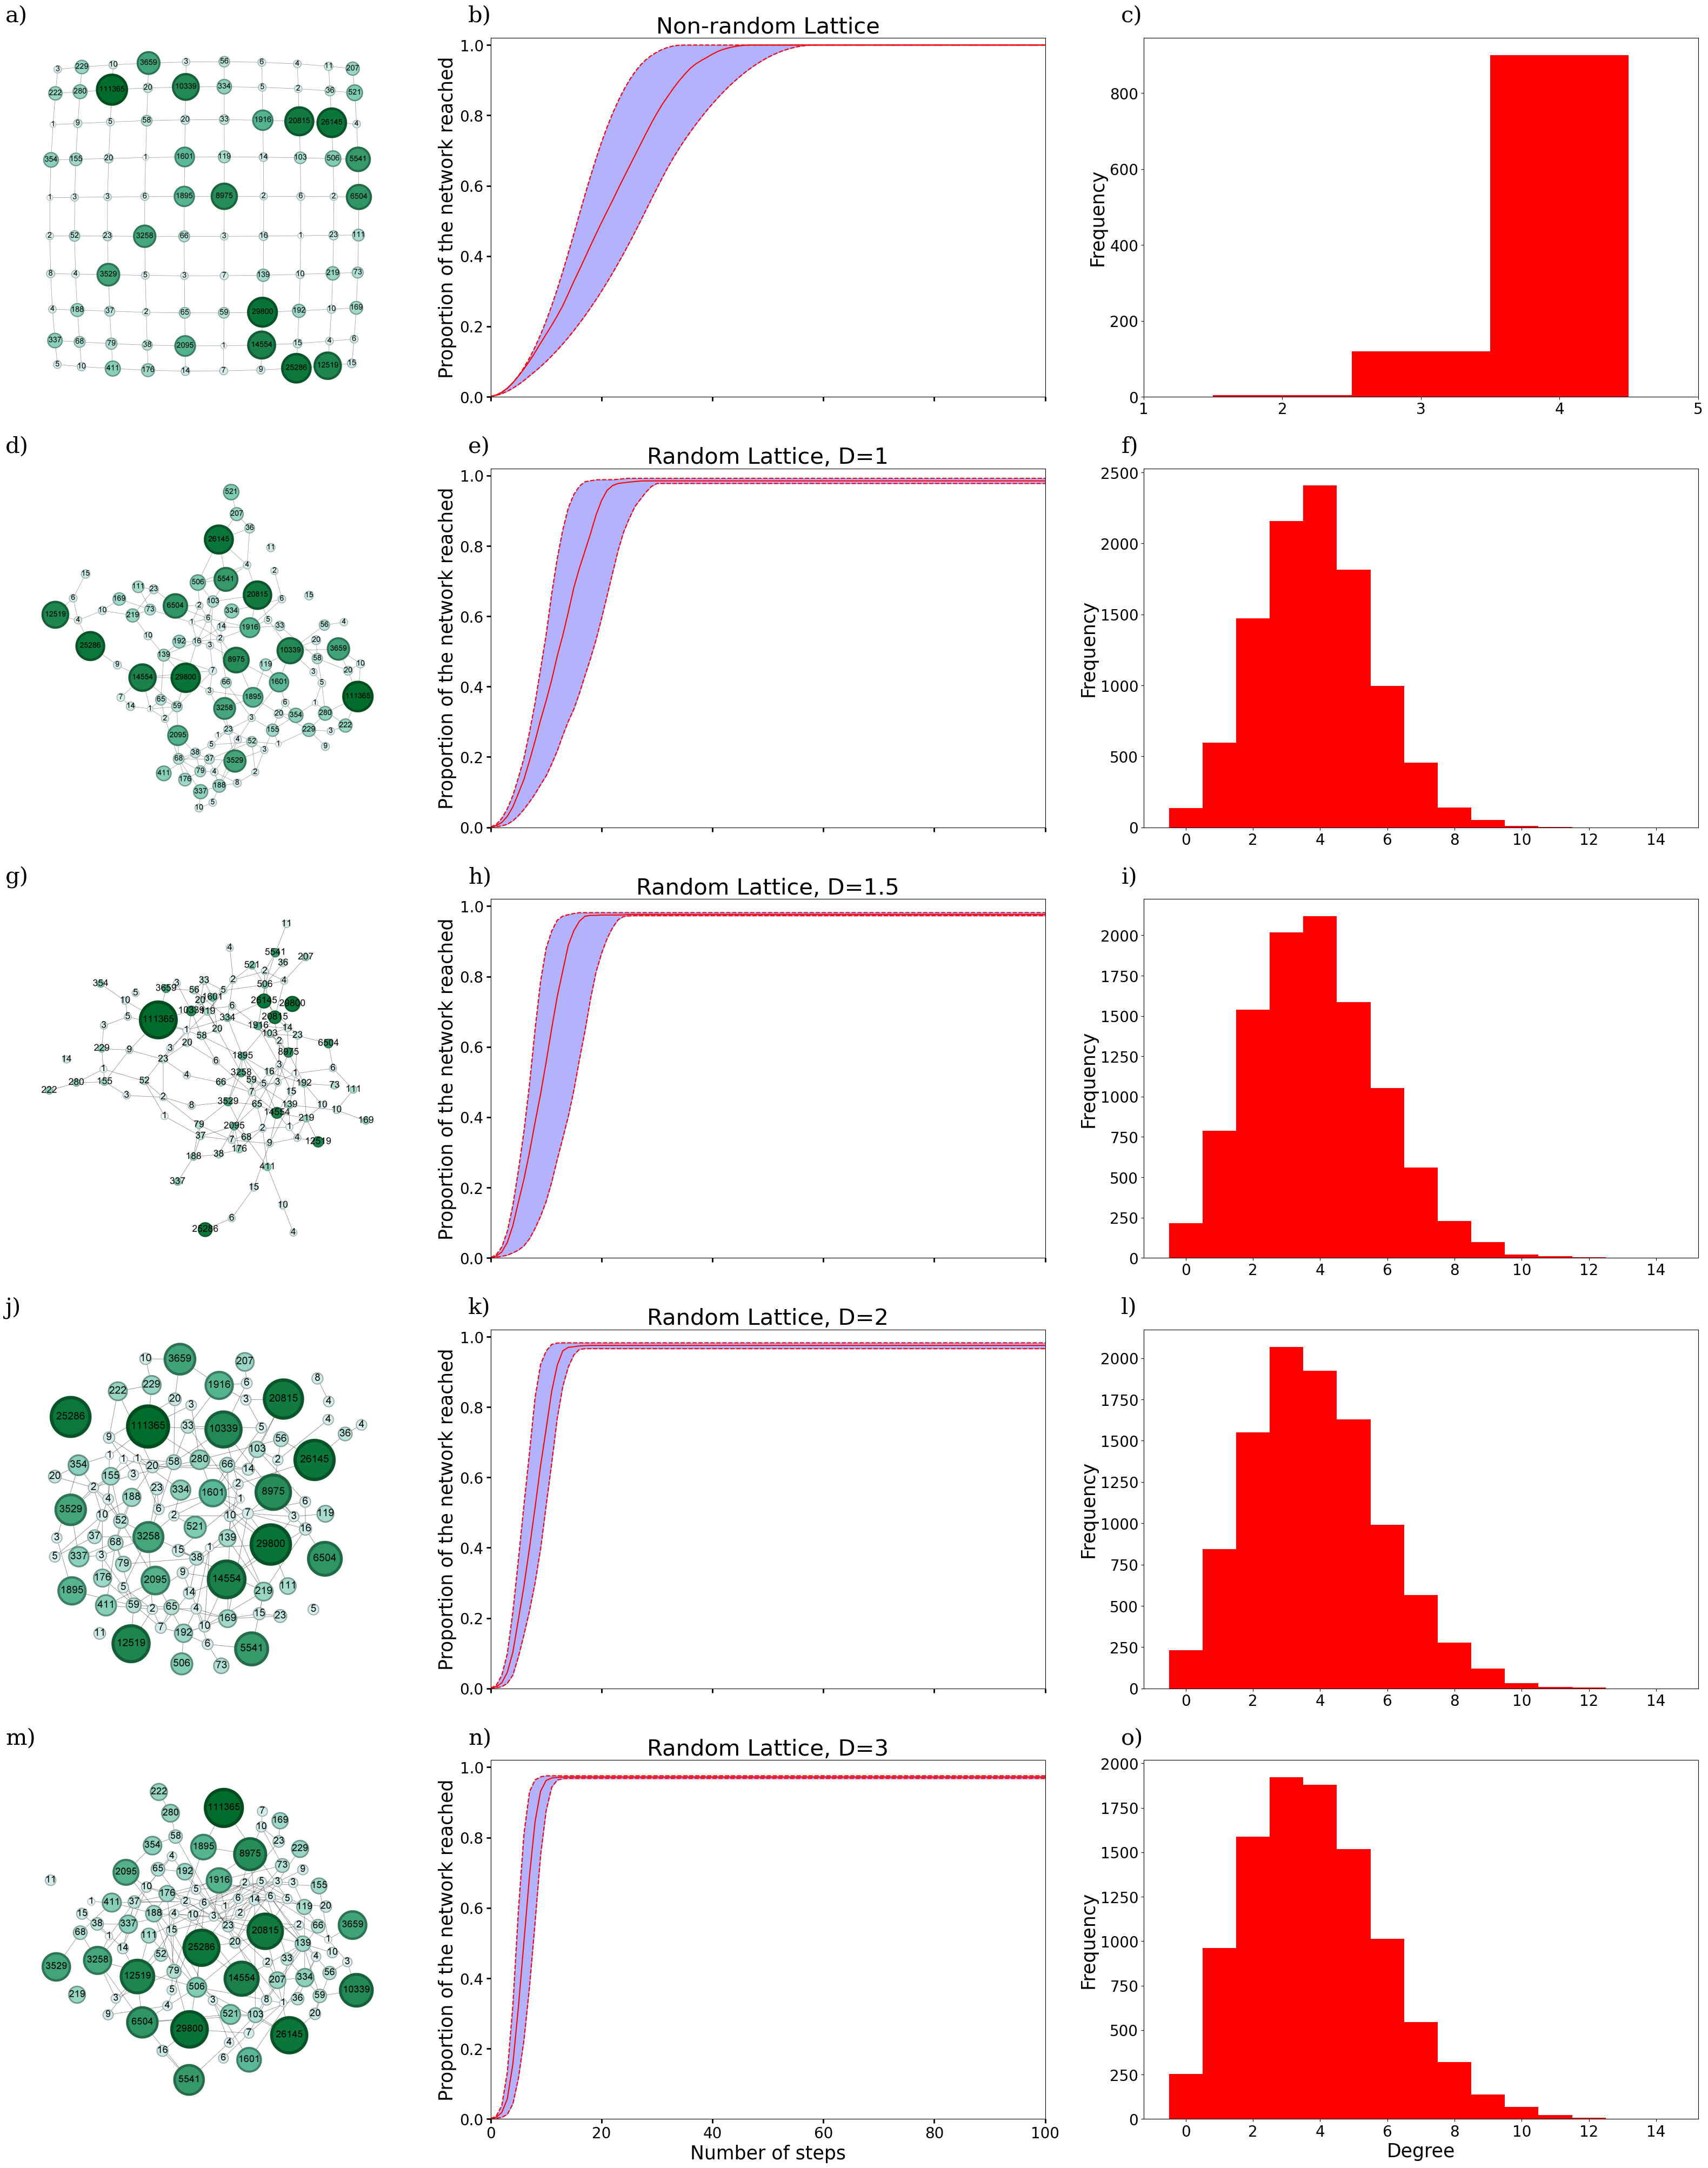

In [159]:
fig, ax = plt.subplots(5,3,figsize = (40,50),gridspec_kw={'width_ratios': [2,3, 3]})

Xg = np.linspace(0,len(LI_g)-1,len(LI_g))
ax[0][1].plot(LI_g,color = "r",linestyle = "--")
ax[0][1].plot(UI_g,color = "r",linestyle = "--")
ax[0][1].plot(med_g,color = "r",linestyle = "-")
ax[0][1].fill_between(Xg,LI_g,UI_g,color = "b", alpha = 0.3)
ax[0][1].set_xticklabels([])
ax[0][1].set_ylabel("Proportion of the network reached",fontsize = 25)
ax[0][1].set_title("Non-random Lattice",fontsize = 30)




X1 = np.linspace(0,len(LI_1)-1,len(LI_1))
ax[1][1].plot(LI_1,color = "r",linestyle = "--")
ax[1][1].plot(UI_1,color = "r",linestyle = "--")
ax[1][1].plot(med_1,color = "r",linestyle = "-")
ax[1][1].fill_between(X1,LI_1,UI_1,color = "b", alpha = 0.3)
ax[1][1].set_xticklabels([])
ax[1][1].set_ylabel("Proportion of the network reached",fontsize = 25)
ax[1][1].set_title("Random Lattice, D=1",fontsize = 30)


X15 = np.linspace(0,len(LI_15)-1,len(LI_15))
ax[2][1].plot(LI_15,color = "r",linestyle = "--")
ax[2][1].plot(UI_15,color = "r",linestyle = "--")
ax[2][1].plot(med_15,color = "r",linestyle = "-")
ax[2][1].fill_between(X15,LI_15,UI_15,color = "b", alpha = 0.3)
ax[2][1].set_ylabel("Proportion of the network reached",fontsize = 25)
ax[2][1].set_xticklabels([])
ax[2][1].set_title("Random Lattice, D=1.5",fontsize = 30)



X2 = np.linspace(0,len(LI_2)-1,len(LI_2))
ax[3][1].plot(LI_2,color = "r",linestyle = "--")
ax[3][1].plot(UI_2,color = "r",linestyle = "--")
ax[3][1].plot(med_2,color = "r",linestyle = "-")
ax[3][1].fill_between(X2,LI_2,UI_2,color = "b", alpha = 0.3)
ax[3][1].set_xticklabels([])
ax[3][1].set_ylabel("Proportion of the network reached",fontsize = 25)
ax[3][1].set_title("Random Lattice, D=2",fontsize = 30)






X3 = np.linspace(0,len(LI_3)-1,len(LI_3))
ax[4][1].plot(LI_3,color = "r",linestyle = "--")
ax[4][1].plot(UI_3,color = "r",linestyle = "--")
ax[4][1].plot(med_3,color = "r",linestyle = "-")
ax[4][1].fill_between(X3,LI_3,UI_3,color = "b", alpha = 0.3)
ax[4][1].set_ylabel("Proportion of the network reached",fontsize = 25)
ax[4][1].set_xlabel("Number of steps")
ax[4][1].set_ylabel("Proportion of the network reached",fontsize = 25)
ax[4][1].set_title("Random Lattice, D=3",fontsize = 30)





for i in range(5):
    ax[i][1].set_xlim(0,M)
    ax[i][1].tick_params(width = 2, length = 6)
    ax[i][1].set_ylim(0,1.02)
    
  






ax[0][2].hist(degrees_grid,color = "r",bins = [1.5,2.5,3.5,4.5])
ax[0][2].set_ylabel("Frequency",fontsize = 25)
ax[0][2].set_xlim(1,5)
ax[0][2].set_xticks([1,2,3,4,5])


ax[1][2].hist(degrees_1,color = "r",bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5])
ax[1][2].set_ylabel("Frequency",fontsize = 25)
ax[1][2].set_title("")


ax[2][2].hist(degrees_15,color = "r",bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5])
ax[2][2].set_ylabel("Frequency",fontsize = 25)
ax[2][2].set_title("")



ax[3][2].hist(degrees_2,color = "r",bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5])
ax[3][2].set_ylabel("Frequency",fontsize = 25)
ax[3][2].set_title("")


ax[4][2].hist(degrees_3,color = "r",bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5])
ax[4][2].set_ylabel("Frequency",fontsize = 25)
ax[4][2].set_xlabel("Degree")
ax[4][2].set_title("")
    
    
img = mpimg.imread('small networks/grid.png')
ax[0][0].imshow(img)
ax[0][0].axis("off")


img = mpimg.imread('small networks/grid_r_D=1.png')
ax[1][0].imshow(img)
ax[1][0].axis("off")



img = mpimg.imread('small networks/grid_r_D=15.png')
ax[2][0].imshow(img)
ax[2][0].axis("off")



img = mpimg.imread('small networks/grid_r_D=2.png')
ax[2+1][0].imshow(img)
ax[2+1][0].axis("off")


img = mpimg.imread('small networks/grid_r_D=3.png')
ax[3+1][0].imshow(img)
ax[3+1][0].axis("off")









trans = mtransforms.ScaledTranslation(-30/72, 15/72, fig.dpi_scale_trans)
letters = ["a)","b)","c)","d)","e)","f)","g)","h)","i)","j)","k)","l)","m)","n)","o)","p)","q)","r)","s)","t)","u)","v)","w)","x)","y)","z)"]
for i in range(3):
    for j in range(5):
        ax[j][1].set_xlim(0,100)
        ax[j][i].tick_params(axis='both',labelsize = 20)
        k = i+3*j
        ax[j][i].text(0.0, 1.0, letters[k], transform=ax[j][i].transAxes + trans,
            fontsize=30, va='bottom', fontfamily='serif')
    


    plt.savefig("images/connectivity_plots.png",bbox_inches='tight',dpi =100)

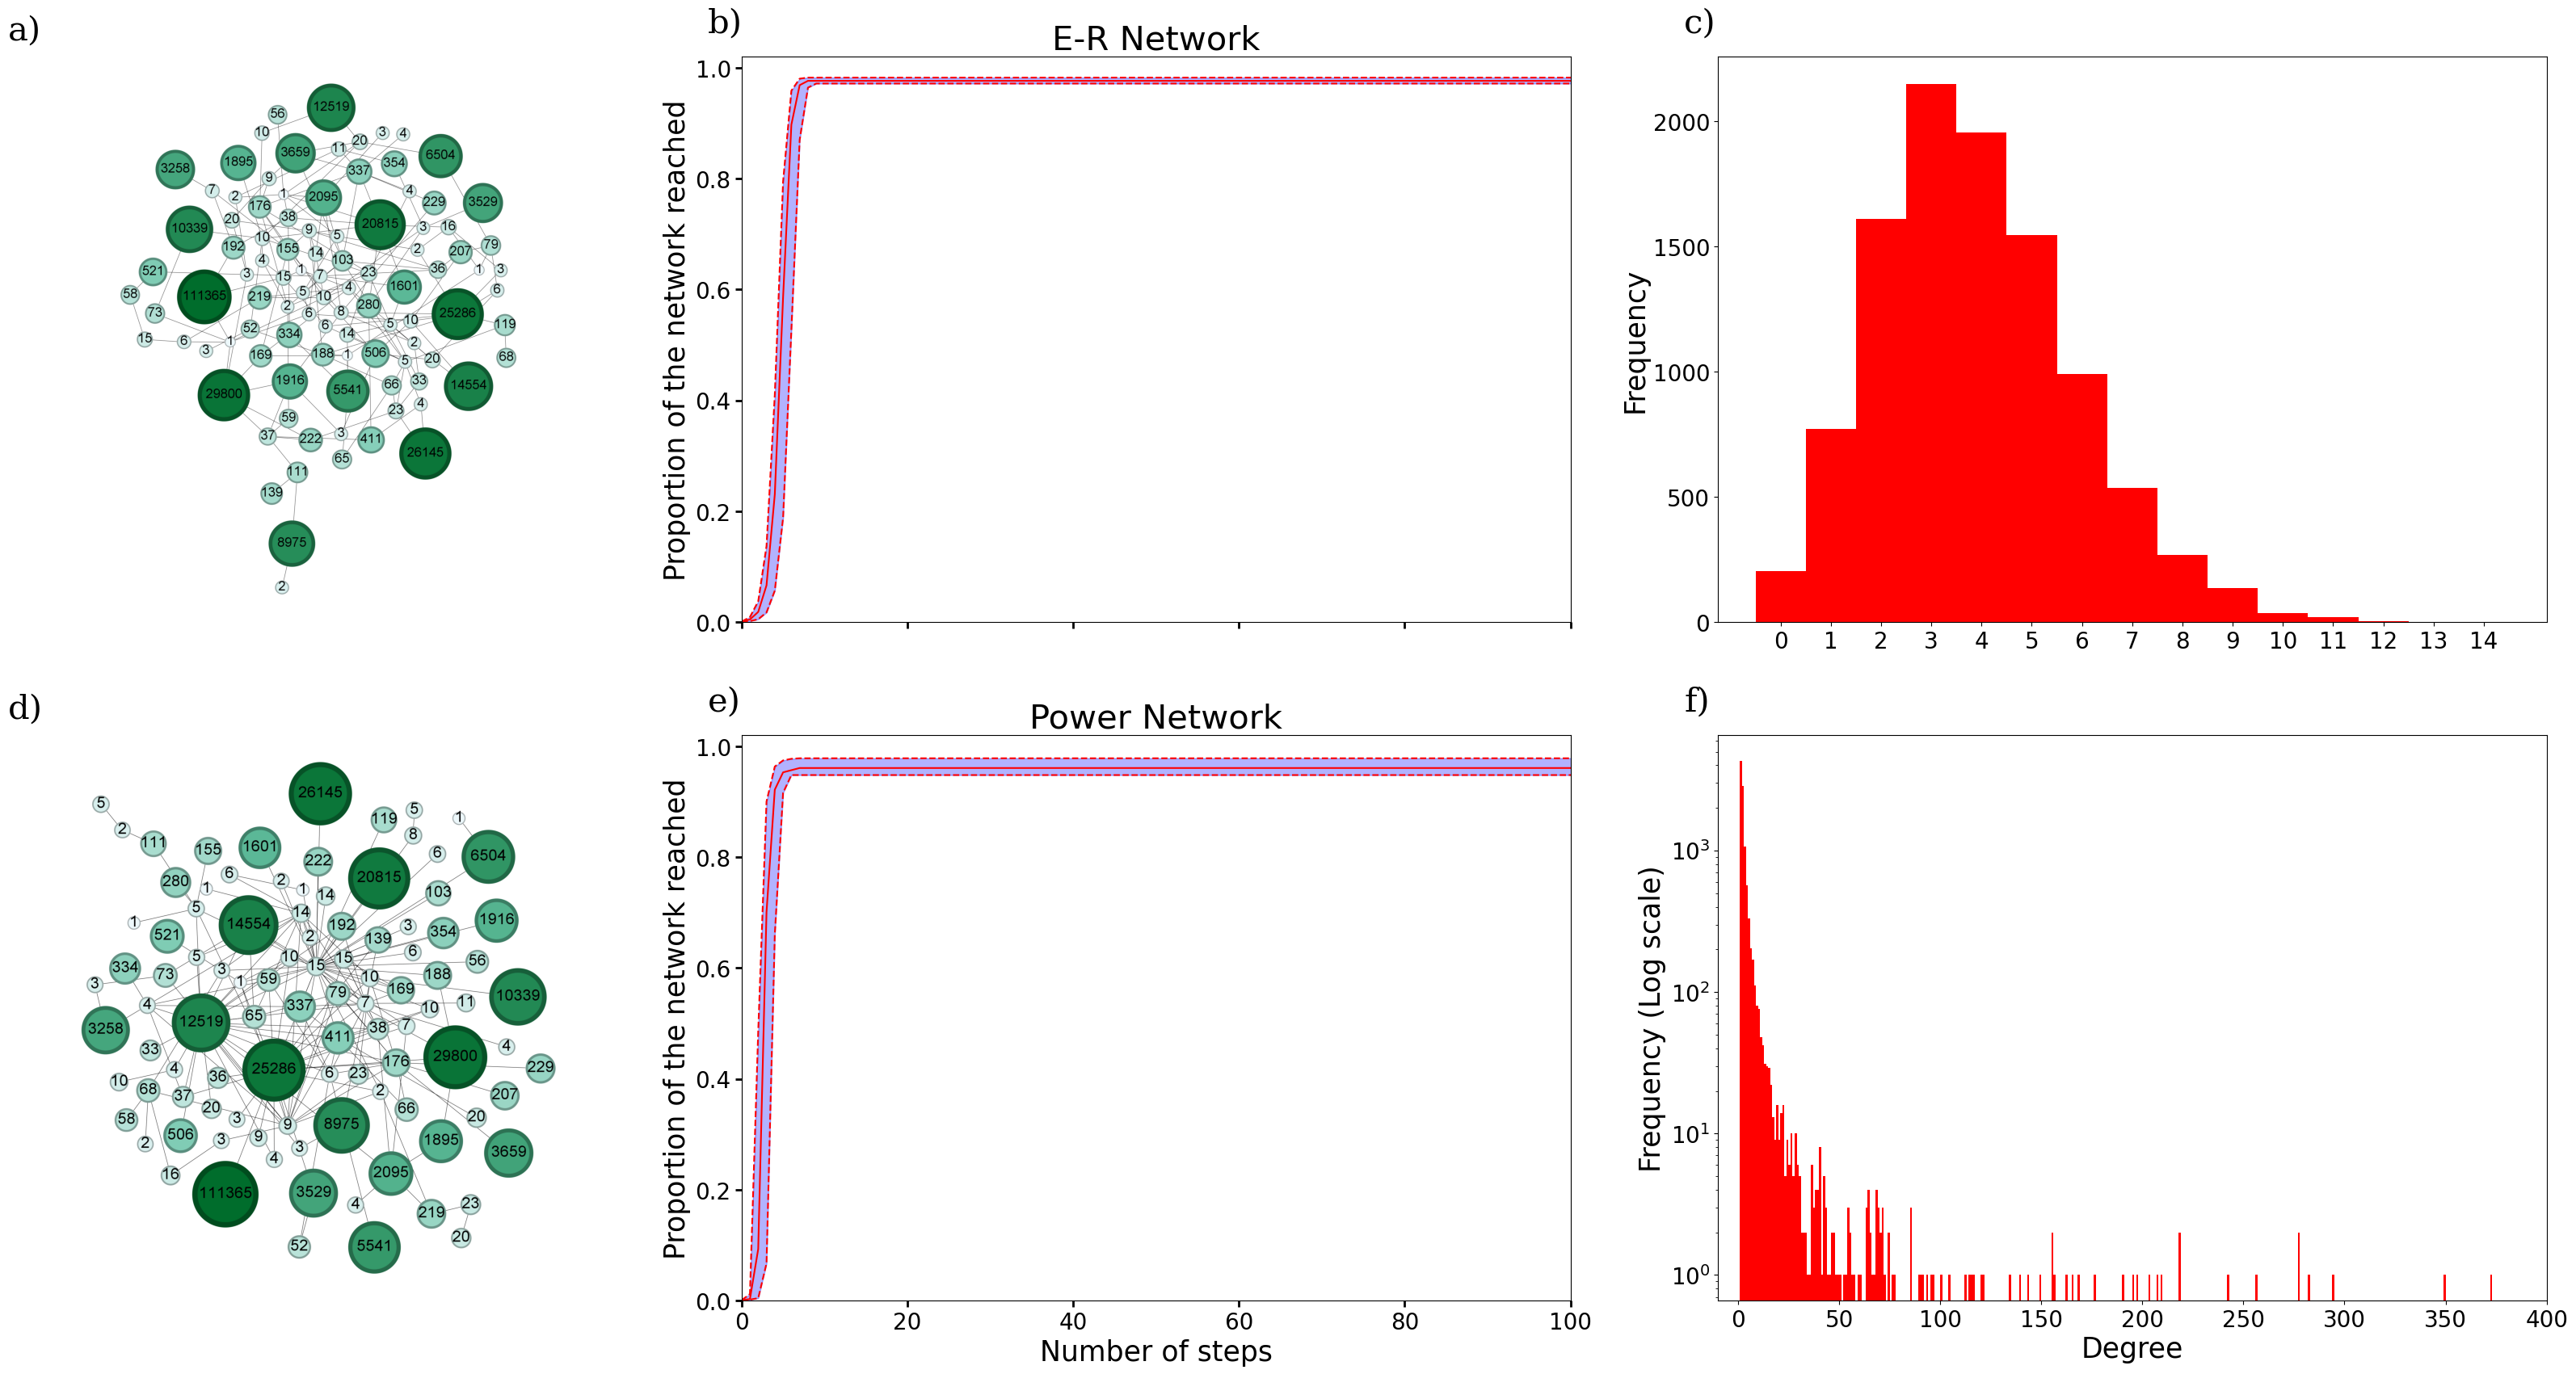

In [161]:
fig, ax = plt.subplots(2,3,figsize = (40,20),gridspec_kw={'width_ratios': [2,3, 3]})

Xer = np.linspace(0,len(LI_er)-1,len(LI_er))
ax[0][1].plot(LI_er,color = "r",linestyle = "--")
ax[0][1].plot(UI_er,color = "r",linestyle = "--")
ax[0][1].plot(med_er,color = "r",linestyle = "-")
ax[0][1].fill_between(Xer,LI_er,UI_er,color = "b", alpha = 0.3, label = "95% Confidence Interval")
ax[0][1].set_xticklabels([])
ax[0][1].set_ylabel("Proportion of the network reached",fontsize = 25)
ax[0][1].set_title("E-R Network",fontsize = 30)



Xpower = np.linspace(0,len(LI_power)-1,len(LI_power))
ax[1][1].plot(LI_power,color = "r",linestyle = "--")
ax[1][1].plot(UI_power,color = "r",linestyle = "--")
ax[1][1].plot(med_power,color = "r",linestyle = "-")
ax[1][1].set_ylabel("Proportion of the network reached",fontsize = 25)
ax[1][1].fill_between(Xpower,LI_power,UI_power,color = "b", alpha = 0.3, label = "95% Confidence Interval")
ax[1][1].set_xlabel("Number of steps")
ax[1][1].set_title("Power Network",fontsize = 30)

for i in range(2):
    ax[i][1].set_xlim(0,M)
    ax[i][1].tick_params(width = 2, length = 6)
    ax[i][1].set_ylim(0,1.02)
    
ax[1][2].hist(degrees_power,bins = bins3,color = "r")
ax[1][2].set_ylabel("Frequency (Log scale)",fontsize = 25)
ax[1][2].set_xlabel("Degree")
ax[1][2].set_xlim(-10,400)
ax[1][2].set_yscale("log")


ax[0][2].hist(degrees_er,bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5],color = "r")
ax[0][2].set_ylabel("Frequency",fontsize = 25)
ax[0][2].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]) 

img = mpimg.imread('small networks/er.png')
ax[0][0].imshow(img)
ax[0][0].axis("off")


img = mpimg.imread('small networks/power.png')
ax[1][0].imshow(img)
ax[1][0].axis("off")

trans = mtransforms.ScaledTranslation(-30/72, 15/72, fig.dpi_scale_trans)
letters = ["a)","b)","c)","d)","e)","f)","g)","h)","i)","j)","k)","l)","m)","n)","o)","p)","q)","r)","s)","t)","u)","v)","w)","x)","y)","z)"]
for i in range(3):
    for j in range(2):
        ax[j][1].set_xlim(0,100)
        ax[j][i].tick_params(axis='both',labelsize = 20)
        k = i+3*j
        ax[j][i].text(0.0, 1.0, letters[k], transform=ax[j][i].transAxes + trans,
            fontsize=30, va='bottom', fontfamily='serif')
    

plt.savefig("images/connectivity_plots_appendix.png",bbox_inches='tight',dpi =100)

## Small Network Examples

In [5]:
fit_alpha,fit_beta,fit_loc,fit_scale = 1.4709515345874549,3.9521542417123277,-0.024762702437304038,6.7

In [621]:
n = 10

G_grid = generate_premises_grid(n,n)
pop = pd.Series(stats.beta.rvs(fit_alpha,fit_beta, loc=fit_loc, scale=fit_scale, size = len(G_grid.nodes))).map(lambda x: round(10**x))
add_premise_pop(G_grid,pop,365)
nx.write_gexf(G_grid, "small networks/grid.gexf")

deg_sum_grid = sum([G_grid.degree(n) for n in G_grid.nodes])

er_power = 4/(n*(n-1))
deg_sum_er = 0
while abs((deg_sum_grid-deg_sum_er)/deg_sum_grid)>0.01:
    G_er = generate_premises_er(n*n,er_power)
    add_premise_pop(G_er,pop,365)
    deg_sum_er = sum([G_er.degree(n) for n in G_er.nodes])
nx.write_gexf(G_er, "small networks/er.gexf")

power = (7*n-8)/(3*n-4)
deg_sum_power = 0
while abs((deg_sum_grid-deg_sum_power)/deg_sum_grid)>0.01:
    G_power = generate_premises_power_law(n*n,power)
    add_premise_pop(G_power,pop,365)
    deg_sum_power = sum([G_power.degree(n) for n in G_power.nodes])
nx.write_gexf(G_power, "small networks/power.gexf")

P = 0.8
deg_sum_grid_r1 = 0
while abs((deg_sum_grid-deg_sum_grid_r1)/deg_sum_grid)>0.01:
    G_grid_r1 = generate_premises_grid_random(10,10,P,1)
    add_premise_pop(G_grid_r1,pop,365)
    deg_sum_grid_r1 = sum([G_grid_r1.degree(n) for n in G_grid_r1.nodes])
nx.write_gexf(G_grid_r1, "small networks/grid_r_D=1.gexf")

P = 0.22
deg_sum_grid_r2 = 0
while abs((deg_sum_grid-deg_sum_grid_r2)/deg_sum_grid)>0.01:
    G_grid_r2 = generate_premises_grid_random(10,10,P,2)
    add_premise_pop(G_grid_r2,pop,365)
    deg_sum_grid_r2 = sum([G_grid_r2.degree(n) for n in G_grid_r2.nodes])
nx.write_gexf(G_grid_r2, "small networks/grid_r_D=2.gexf")

P = 0.11
deg_sum_grid_r3 = 0
while abs((deg_sum_grid-deg_sum_grid_r3)/deg_sum_grid)>0.01:
    G_grid_r3 = generate_premises_grid_random(10,10,P,3)
    add_premise_pop(G_grid_r3,pop,365)
    deg_sum_grid_r3 = sum([G_grid_r3.degree(n) for n in G_grid_r3.nodes])
nx.write_gexf(G_grid_r3, "small networks/grid_r_D=3.gexf")

In [683]:
P = 0.35
deg_sum_grid_r15 = 0
while abs((deg_sum_grid-deg_sum_grid_r15)/deg_sum_grid)>0.01:
    G_grid_r15 = generate_premises_grid_random(10,10,P,1.5)
    add_premise_pop(G_grid_r15,pop,365)
    deg_sum_grid_r15 = sum([G_grid_r15.degree(n) for n in G_grid_r15.nodes])
nx.write_gexf(G_grid_r15, "small networks/grid_r_D=15.gexf")

In [6]:
theta = {"grid":
         {"pre2021":{"tau":0.00110078125,"eps_r":0,"eps_s":3.326e-6},
          "post2021":{"tau":0.00110078125,"eps_r": 4e-05,"eps_s": 5.392e-05}},
         "D=1":
         {"pre2021":{"tau":8.8e-4,"eps_r":0,"eps_s":3.326e-6},
          "post2021":{"tau":8.8e-4,"eps_r":4.5e-05,"eps_s":6.066e-5}},
         "D=1.5":
         {"pre2021":{"tau":5.7e-4,"eps_r":0,"eps_s":3.326e-6},
          "post2021":{"tau":5.7e-4,"eps_r":5.775e-05,"eps_s":7.7847e-5}},
         "D=2":
         {"pre2021":{"tau":0.000425,"eps_r":0,"eps_s":3.326e-6},
          "post2021":{"tau":4.25e-4,"eps_r":7.725e-5,"eps_s":10.4133e-5}},
         "grid_r_D=3":
         {"pre2021":{"tau":0.00033,"eps_r":0,"eps_s":3.326e-6},
          "post2021":{"tau":3.3e-4,"eps_r":9.625e-05,"eps_s":12.9745e-5}}
        }

f = lambda I,S: (I**0.5)*(S**0.5)
pop = pd.Series(stats.beta.rvs(fit_alpha,fit_beta, loc=fit_loc, scale=fit_scale, size = len(G.nodes))).map(lambda x: round(10**x))

In [12]:
F = []
K = ["grid","grid_r_D=3"]
D = {}
for k in K:
    D[k] = nx.read_gexf("small networks/" + k + ".gexf")

forces = []
for k in K:
    G = D[k]
    i = 0
    node_attr = {}
    for n in G.nodes():
        node_attr[n] = {"pop": pop[i]}
        i+=1
    nx.set_node_attributes(G,node_attr) 
    i=0
    for n in G.nodes:
        force = 0
        for n2 in G.neighbors(n):
            force += theta[k]["post2021"]["tau"]*f(G.nodes[n]["pop"],G.nodes[n2]["pop"])
        forces.append(force)
        node_attr[n] = {"pop": pop[i],
                       "force": round(force,3)}
        i+=1
    nx.set_node_attributes(G,node_attr)  
    M = max(forces)
    i = 0
    for n in G.nodes:
        force = G.nodes[n]["force"]
        node_attr[n] = {"pop": pop[i],
                       "force": round(force,5),
                        "force_colour" : force/M
                       }
        i+=1
    F.append([node_attr[n]["force"] for n in G.nodes])
    nx.set_node_attributes(G,node_attr)  

    nx.write_gexf(G,"small networks/" + k + "_repro.gexf")    
        
        